In [8]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 
import torch.optim as optim

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [9]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = pipeline.make_student_model()

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

    lambdas = [1, 1, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, 
                                 loss_fn, optimizer, scheduler, noise_dist='uniform', noise_eps=1e-1)

    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_scratch_sched_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 3.1835416854696073
Train Acc: 0.7184
Epoch 2
-------------------------------


Train Loss: 1.6364317551572272
Train Acc: 0.7466
Epoch 3
-------------------------------


Train Loss: 1.5585997842727823
Train Acc: 0.7533666666666666
Epoch 4
-------------------------------


Train Loss: 1.5218285753371867
Train Acc: 0.7549333333333333
Epoch 5
-------------------------------


Train Loss: 1.4862256511728815
Train Acc: 0.7582333333333333
Epoch 6
-------------------------------


Train Loss: 1.1626426742431966
Train Acc: 0.8191
Epoch 7
-------------------------------


Train Loss: 0.5821254858311187
Train Acc: 0.9168333333333333
Epoch 8
-------------------------------


Train Loss: 0.5335635799042722
Train Acc: 0.9214333333333333
Epoch 9
-------------------------------


Train Loss: 0.5100376926838084
Train Acc: 0.9243666666666667
Epoch 10
-------------------------------


Train Loss: 0.4816860981444095
Train Acc: 0.9265333333333333
Epoch 11
-------------------------------


Train Loss: 0.4518094670265279
Train Acc: 0.9294666666666667
Epoch 12
-------------------------------


Train Loss: 0.42496446307669294
Train Acc: 0.9325666666666667
Epoch 13
-------------------------------


Train Loss: 0.4071918322050825
Train Acc: 0.9352
Epoch 14
-------------------------------


Train Loss: 0.3898728732733016
Train Acc: 0.9372
Epoch 15
-------------------------------


Train Loss: 0.37412175720042373
Train Acc: 0.9388
Epoch 1
-------------------------------


Validation accuracy: 72.5%, Validation loss: 0.869483 

Epoch 2
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.570662 

Epoch 3
-------------------------------


Validation accuracy: 83.3%, Validation loss: 0.485969 

Epoch 4
-------------------------------


Validation accuracy: 84.2%, Validation loss: 0.449714 

Epoch 5
-------------------------------


Validation accuracy: 84.8%, Validation loss: 0.428730 

Epoch 6
-------------------------------


Validation accuracy: 85.1%, Validation loss: 0.414735 

Epoch 7
-------------------------------


Validation accuracy: 85.5%, Validation loss: 0.404213 

Epoch 8
-------------------------------


Validation accuracy: 85.8%, Validation loss: 0.395075 

Epoch 9
-------------------------------


Validation accuracy: 86.1%, Validation loss: 0.387678 

Epoch 10
-------------------------------


Validation accuracy: 86.3%, Validation loss: 0.381312 

Epoch 11
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.375837 

Epoch 12
-------------------------------


Validation accuracy: 86.6%, Validation loss: 0.370874 

Epoch 13
-------------------------------


Validation accuracy: 86.7%, Validation loss: 0.366766 

Epoch 14
-------------------------------


Validation accuracy: 86.8%, Validation loss: 0.363330 

Epoch 15
-------------------------------


Validation accuracy: 86.9%, Validation loss: 0.360155 

Epoch 16
-------------------------------


Validation accuracy: 87.0%, Validation loss: 0.357455 

Epoch 17
-------------------------------


Validation accuracy: 87.1%, Validation loss: 0.355033 

Epoch 18
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.353032 

Epoch 19
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.350979 

Epoch 20
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.349340 

Epoch 21
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.347877 

Epoch 22
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.346349 

Epoch 23
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.345114 

Epoch 24
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.343858 

Epoch 25
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.342744 

Epoch 26
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.341435 

Epoch 27
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.340532 

Epoch 28
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.339627 

Epoch 29
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.338753 

Epoch 30
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.338117 



FSGM Accuracy [0.8778, 0.8544, 0.8248, 0.7913, 0.7561, 0.7159, 0.6759, 0.6343, 0.5909, 0.5496]


Noise Accuracy [0.8778, 0.8668, 0.8434, 0.7997, 0.7535, 0.6962, 0.6211, 0.5488, 0.5209, 0.443]


KeyboardInterrupt: ignored

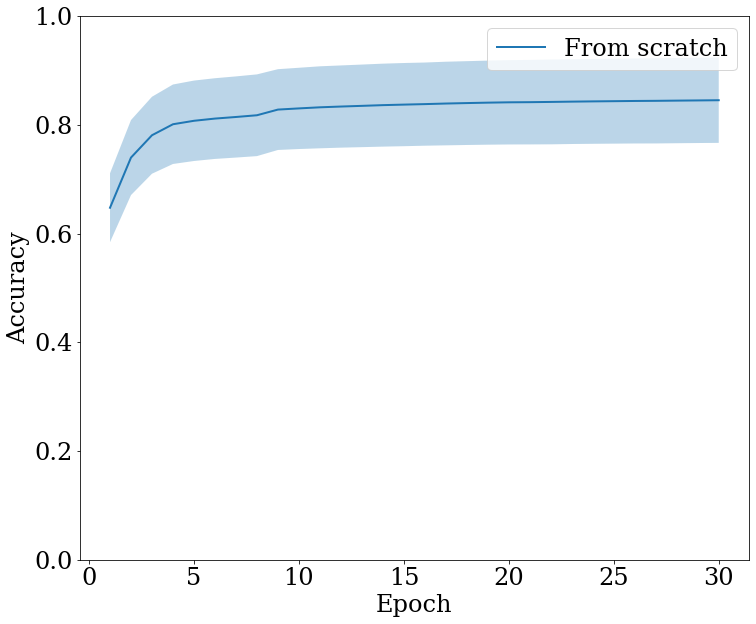

In [10]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

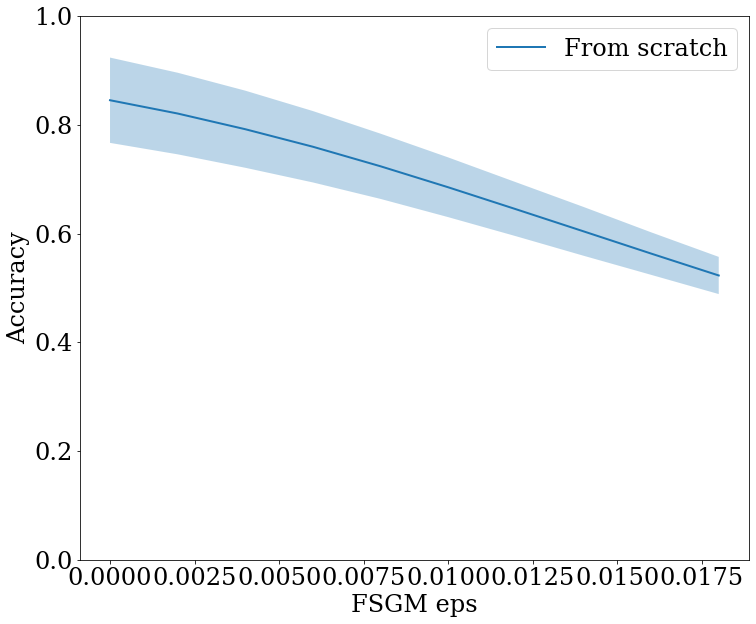

In [11]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

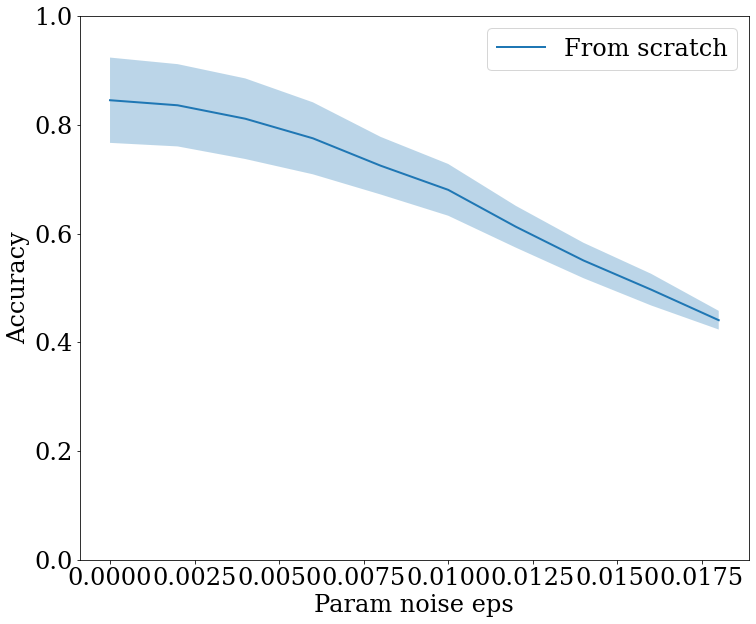

In [12]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [13]:
with open(pipeline.get_path()+'/history_antidistil_scratch.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
